## Bank Churn Analysis


### Objective

The main objective is to analyze customer data to predict and mitigate customer churn at ABC Bank.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#graphs show automatically

pd.set_option('display.max_columns', None)
plt.style.use('seaborn')
#sets style to seaborn

In [2]:
#load data as df

df = pd.read_csv(r"Bank Churn Dataset for Homework\train.csv", index_col=0, header=0)

In [3]:
#view the top 5 rows of df

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
#view the records or properties of df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [5]:
#make a copy of df

df_copy = df.copy()

### Data Preparation

In [6]:
#drop irrelevant column

df.drop(columns='Surname', inplace=True)

In [7]:
#check for duplicated observations

df.duplicated().sum()

30

In [8]:
#drop the duplicate values

df = df.drop_duplicates()

In [9]:
#rename 'Geography' to 'Country'

df.rename(columns={"Geography": "Country"}, inplace=True)

In [10]:
#convert the data type of some features

df['HasCrCard'] = df['HasCrCard'].astype('int')
df['IsActiveMember'] = df['IsActiveMember'].astype('int')
df['Age'] = df['Age'].astype('int')

In [11]:
#shows the properties of df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165004 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165004 non-null  int64  
 1   CreditScore      165004 non-null  int64  
 2   Country          165004 non-null  object 
 3   Gender           165004 non-null  object 
 4   Age              165004 non-null  int32  
 5   Tenure           165004 non-null  int64  
 6   Balance          165004 non-null  float64
 7   NumOfProducts    165004 non-null  int64  
 8   HasCrCard        165004 non-null  int32  
 9   IsActiveMember   165004 non-null  int32  
 10  EstimatedSalary  165004 non-null  float64
 11  Exited           165004 non-null  int64  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 14.5+ MB


### Data Understanding and Exploration

In [12]:
#summary statistics of df

df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650040e+05,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000
mean,1.569200e+07,656.458037,38.125355,5.020515,55477.203173,1.554465,0.753933,0.497739,112576.218053,0.211601
std,7.139829e+04,80.101397,8.866925,2.806134,62817.816773,0.547161,0.430719,0.499996,50293.024195,0.408445
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563312e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.645000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [13]:
#summary statistics of some features grouped by Exited

df.groupby('Exited')[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','EstimatedSalary']].describe()

CreditScore                                                            \
             count        mean        std    min    25%    50%    75%    max   
Exited                                                                         
0         130089.0  657.596207  79.782284  350.0  599.0  662.0  711.0  850.0   
1          34915.0  652.217356  81.140056  350.0  593.0  651.0  708.0  850.0   

             Age                                                       Tenure  \
           count       mean       std   min   25%   50%   75%   max     count   
Exited                                                                          
0       130089.0  36.559717  8.147318  18.0  31.0  36.0  40.0  92.0  130089.0   
1        34915.0  43.958728  9.004508  18.0  38.0  44.0  50.0  92.0   34915.0   

                                                       Balance                \
            mean       std  min  25%  50%  75%   max     count          mean   
Exited                                                                         
0       5.048997  2.800024  0.0  3.0  5.0  7.0  10.0  130089.0  51256.082961   
1       4.914392  2.826295  0.0  3.0  5.0  7.0  10.0   34915.0  71204.578434   

                                                               NumOfProducts  \
                 std  min  25%       50%        75%        max         count   
Exited                                                                         
0       62190.310255  0.0  0.0      0.00  116858.66  250898.09      130089.0   
1       62647.596247  0.0  0.0  98955.87  125437.14  238387.56       34915.0   

                                                    HasCrCard            \
            mean       std  min  25%  50%  75%  max     count      mean   
Exited                                                                    
0       1.615279  0.494632  1.0  1.0  2.0  2.0  4.0  130089.0  0.758865   
1       1.327882  0.661947  1.0  1.0  1.0  1.0  4.0   34915.0  0.735558   

                                          EstimatedSalary                 \
             std  min  25%  50%  75%  max           count           mean   
Exited                                                                     
0       0.427774  0.0  1.0  1.0  1.0  1.0        130089.0  112085.806243   
1       0.441042  0.0  0.0  1.0  1.0  1.0         34915.0  114403.432201   

                                                                         
                 std    min        25%        50%        75%        max  
Exited                                                                   
0       50215.193244  11.58  74425.410  116977.89  153727.32  199992.48  
1       50540.801860  11.58  74965.525  120892.96  158750.53  199992.48

In [14]:
#function to create age category

def age_cat(a):
    if (a['Age'] >= 18) & (a['Age'] <= 30):
        return 'Youth'
    elif (a['Age'] >= 31) & (a['Age'] <= 50):
        return 'Adult'
    elif (a['Age'] >= 51) & (a['Age'] <= 70):
        return 'Middle Age'
    else:
        return 'Old'

df['Age Category'] = df.apply(age_cat, axis=1)

In [15]:
#creates tenure category feature

bins = [0, 3, 6, 11]
labels = ['New', 'Intermediate', 'Old']
df['Tenure Category'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=False)

In [16]:
#show the top rows 

df.head(8)

,CustomerId,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Category,Tenure Category
id,,,,,,,,,,,,,,
0,15674932,668,France,Male,33,3,0.00,2,1,0,181449.97,0,Adult,Intermediate
1,15749177,627,France,Male,33,1,0.00,2,1,1,49503.50,0,Adult,New
2,15694510,678,France,Male,40,10,0.00,2,1,0,184866.69,0,Adult,Old
3,15741417,581,France,Male,34,2,148882.54,1,1,1,84560.88,0,Adult,New
4,15766172,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0,Adult,Intermediate
5,15771669,588,Germany,Male,36,4,131778.58,1,1,0,136024.31,1,Adult,Intermediate
6,15692819,593,France,Female,30,8,144772.69,1,1,0,29792.11,0,Youth,Old
7,15669611,678,Spain,Male,37,1,138476.41,1,1,0,106851.60,0,Adult,New


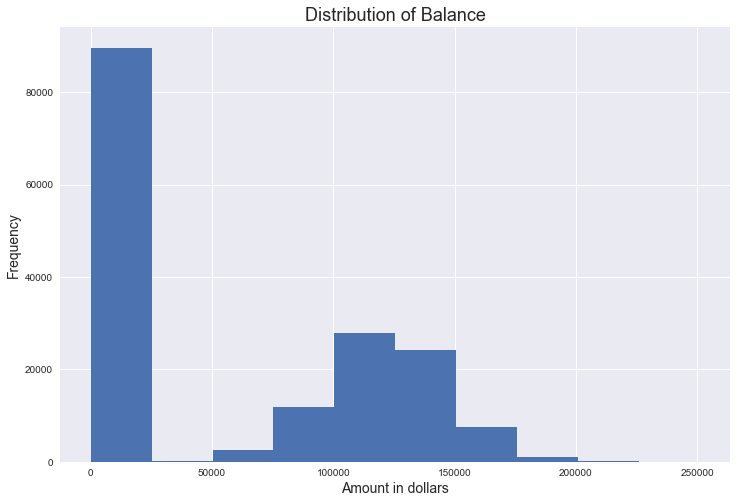

In [17]:
plt.figure(figsize=(12,8))
plt.hist(df['Balance'])
plt.xlabel("Amount in dollars", fontsize=14)
plt.ylabel("Frequency", fontsize=14,)
plt.title("Distribution of Balance", fontsize=18);

The tallest bar is at the far left, indicating that the majority of the observations have a balance close to $0.The frequency of observations decreases as the balance amount increases. This suggests that fewer people have higher balances.There is a significant drop after the first bin, and the subsequent bins have progressively fewer observations, forming a right-skewed distribution.

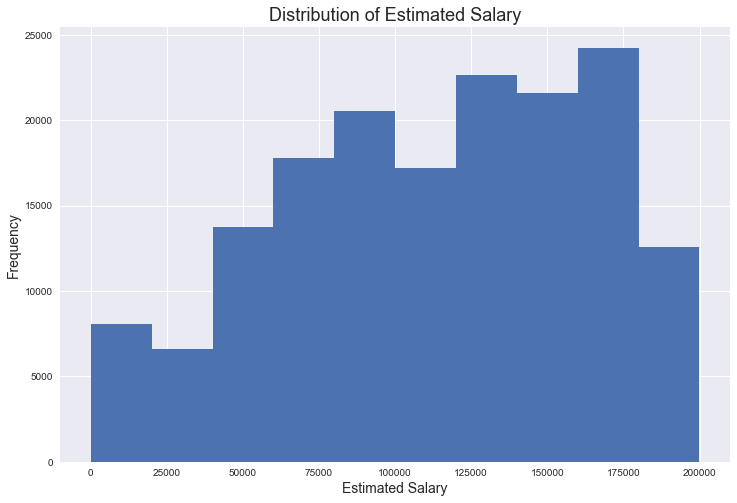

In [18]:
plt.figure(figsize=(12,8))
plt.hist(df['EstimatedSalary'])
plt.xlabel("Estimated Salary", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Estimated Salary", fontsize=18);

The distribution of estimated salaries is not symmetric. Instead, it has several peaks, indicating that the salaries are not evenly distributed across the range.The first peak occurs just before 50,000, suggesting that a large number of observations fall into this salary range. 
Additional peaks appear at intervals, notably around 75,000, 100,000, 125,000, and beyond. This pattern may indicate regular salary groupings or common salary levels within the dataset. The frequencies of observations for salary ranges do not steadily decrease or increase, but vary. This implies that there are several common salary levels, as opposed to one dominant salary level.

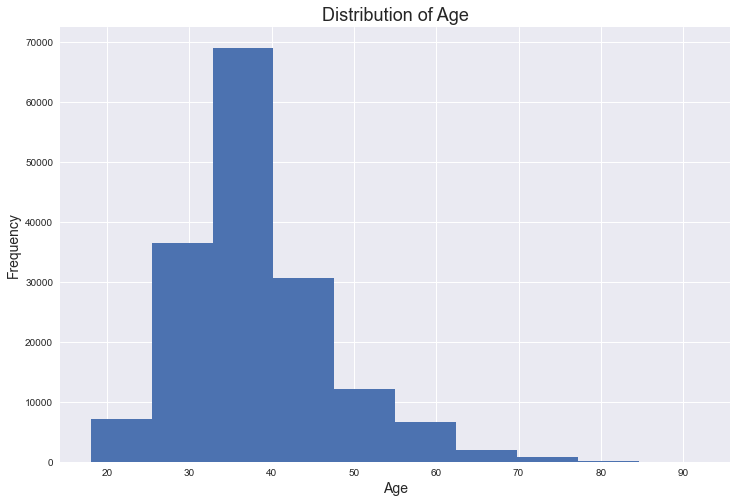

In [19]:
plt.figure(figsize=(12,8))
plt.hist(df['Age'])
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Age", fontsize=18);

This pattern of distribution suggests a young population with a significant number of individuals in their 30s, and fewer individuals in the older age groups.

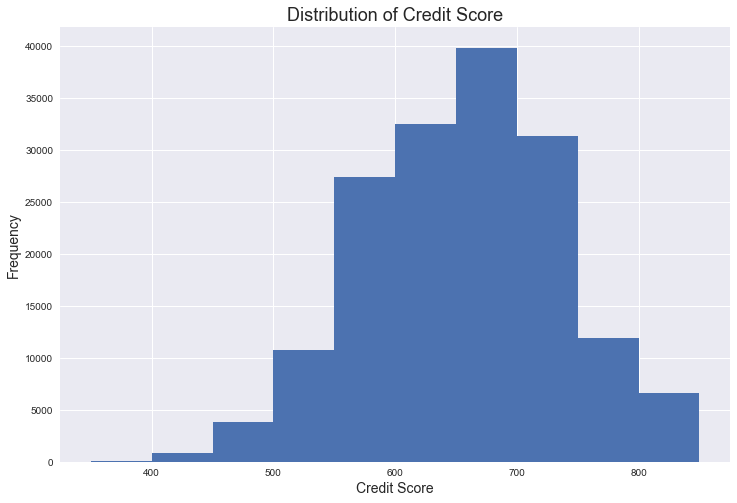

In [20]:
plt.figure(figsize=(12,8))
plt.hist(df['CreditScore'])
plt.xlabel("Credit Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Credit Score", fontsize=18);

The distribution appears to be somewhat normally distributed with a slight skew to the right, indicating that most individuals have credit scores centered around the middle bins.
The peak of the distribution is around the 600-650 bin, which suggests that the largest number of individuals in this dataset have credit scores within this range.
There are relatively few individuals with very low credit scores (below 500) or very high credit scores (above 750).

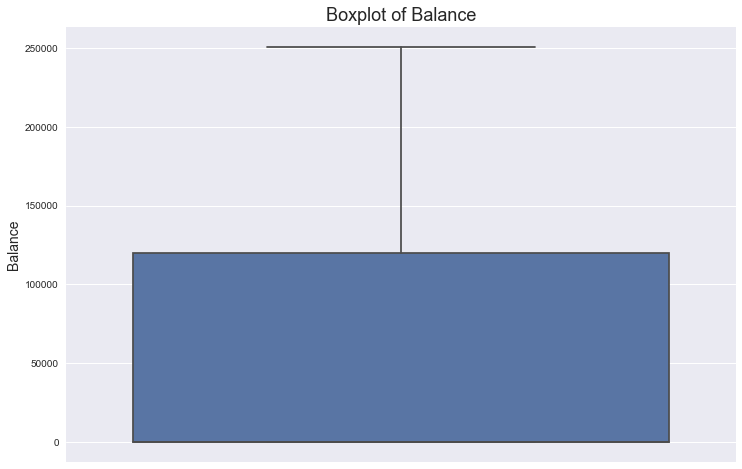

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(y = "Balance", data = df)
plt.ylabel("Balance", fontsize=14)
plt.title("Boxplot of Balance", fontsize=18);

There is no whisker extending downwards and no horizontal line (to show median) from the box, this suggests that the data's minimum value and median value are equal to the first quartile which is zero in this case, indicating no variation in the lower half of the dataset.

The whisker extending upward represents the range of data falling within 1.5 IQRs from the third quartile, thus giving a sense of the spread of the upper part of the data. Points that may be considered outliers or extreme values are not distinctly visible here, but there is a hint of a long upper whisker, suggesting some high values well above the median. The absence of any visible dots beyond the upper whisker implies there may be no significant outliers.

The 'Balance' axis indicates the value range of the account balance in the dataset, with the plot showing balances from zero to above 250,000 dollars.

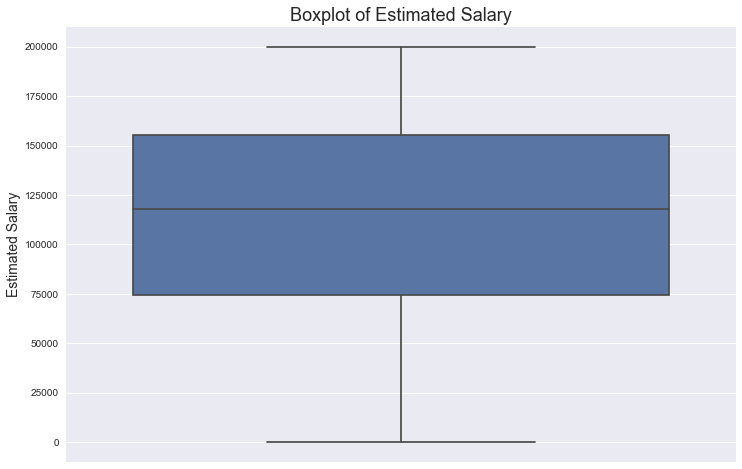

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(y = "EstimatedSalary", data = df)
plt.ylabel("Estimated Salary", fontsize=14)
plt.title("Boxplot of Estimated Salary", fontsize=18);

The horizontal line inside the box indicates the median salary, which appears to be roughly around 120,000.
The bottom edge of the box represents the first quartile, which is around 75,000, suggesting that 25% of the salaries are below this amount.
The top edge of the box represents the third quartile, which is just below 150,000, indicating that 75% of the salaries are below this amount.
The whiskers of the boxplot show the range of the data. There are no outliers in this boxplot. The lower whisker extends down to 0, and the upper whisker extends up to approximately 200,000, indicates that the higher earners among the bank's account holders. A lower whisker near $0 suggests that a subset of the account holders may have very low or no reported income. This could include students, individuals who are unemployed, or those who might not have a regular income. However, the presence of account holders with very low or no salary may also indicate a diverse customer base that includes a range of financial backgrounds.

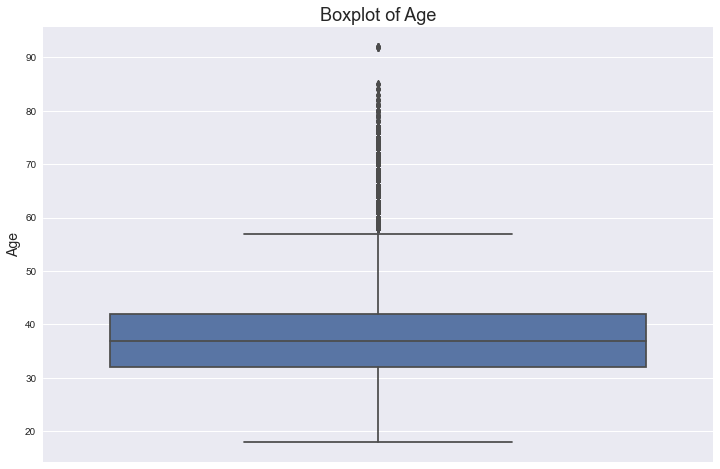

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(y = "Age", data = df)
plt.ylabel("Age", fontsize=14)
plt.title("Boxplot of Age", fontsize=18);

The horizontal line in the middle of the boxplot shows the median age of the customers of ABC Bank is 37 which indicates a young population. The lower edge of the box, the first quartile is slightly above 30 which means 25% of the customers are below that age. The upper edge of the box, the third quartile, is a little above 40 - maybe 42, shows that 75% of the bank's clients are below that age. The whiskers show the range of the age, with the lower whisker at 18 and upper whisker at 58. The points above the whisker indicate the presence of outliers,that is a few older people.

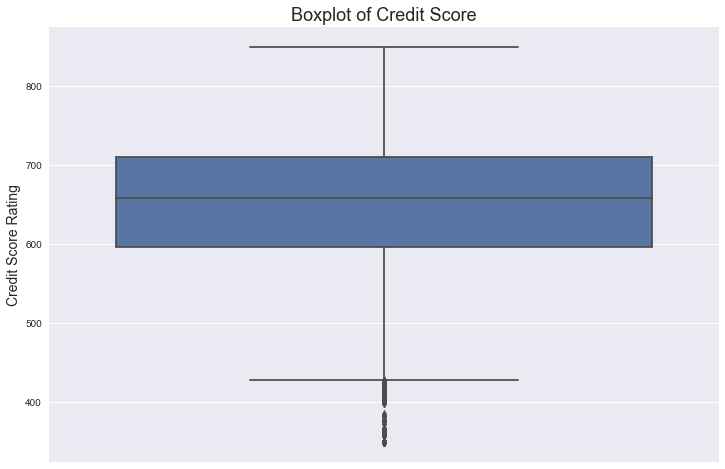

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(y = "CreditScore", data = df)
plt.ylabel("Credit Score Rating", fontsize=14)
plt.title("Boxplot of Credit Score", fontsize=18);

The horizontal line in the boxplot boxplot shows the median credit score of the customers of ABC Bank is 659 which indicates that majority of the clients have a fair credit score rating. The lower edge of the box, the first quartile is around 600 which means 25% of the customers have a credit score below that rating. The upper edge of the box, the third quartile, is a little above 700, shows that 75% of the bank's clients have credit scxore rating below that. The whiskers show the range of the age, with the lower whisker at around 420 and upper whisker at 850. The points below the whisker indicate the presence of outliers, this show a few clients have credit score rating that is pretty poor.

In [25]:
#creates a dataframe for correlation matrix

df_corr = df[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

In [26]:
corr_mat = df_corr.corr()
corr_mat

,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,0.000926,0.006952,0.011355,-0.001853
Tenure,0.000926,1.000000,-0.009471,0.007342,0.001021
Balance,0.006952,-0.009471,1.000000,-0.361012,0.008591
NumOfProducts,0.011355,0.007342,-0.361012,1.000000,-0.004294
EstimatedSalary,-0.001853,0.001021,0.008591,-0.004294,1.000000


<AxesSubplot:>

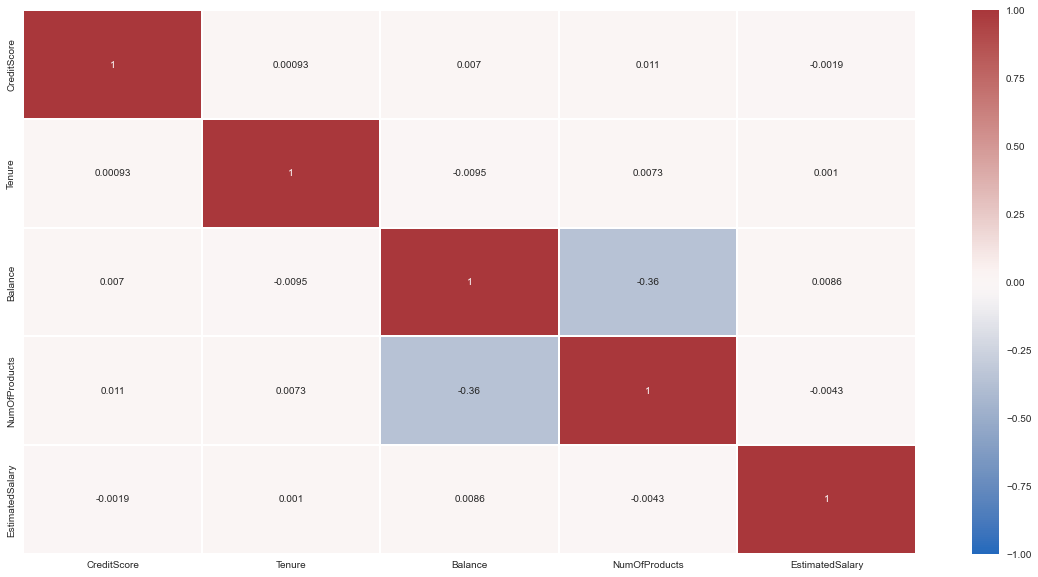

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap='vlag', annot=True,linecolor='white', linewidth=2)

The most notable correlation present in the matrix is between the variables 'Balance' and 'NumOfProducts', which shows a noticeable negative correlation of -0.36. This suggests that as the balance increases, the number of products held by a customer tends to decrease, or vice versa.
All other variables have correlations close to 0 with each other, implying very weak linear relationships.

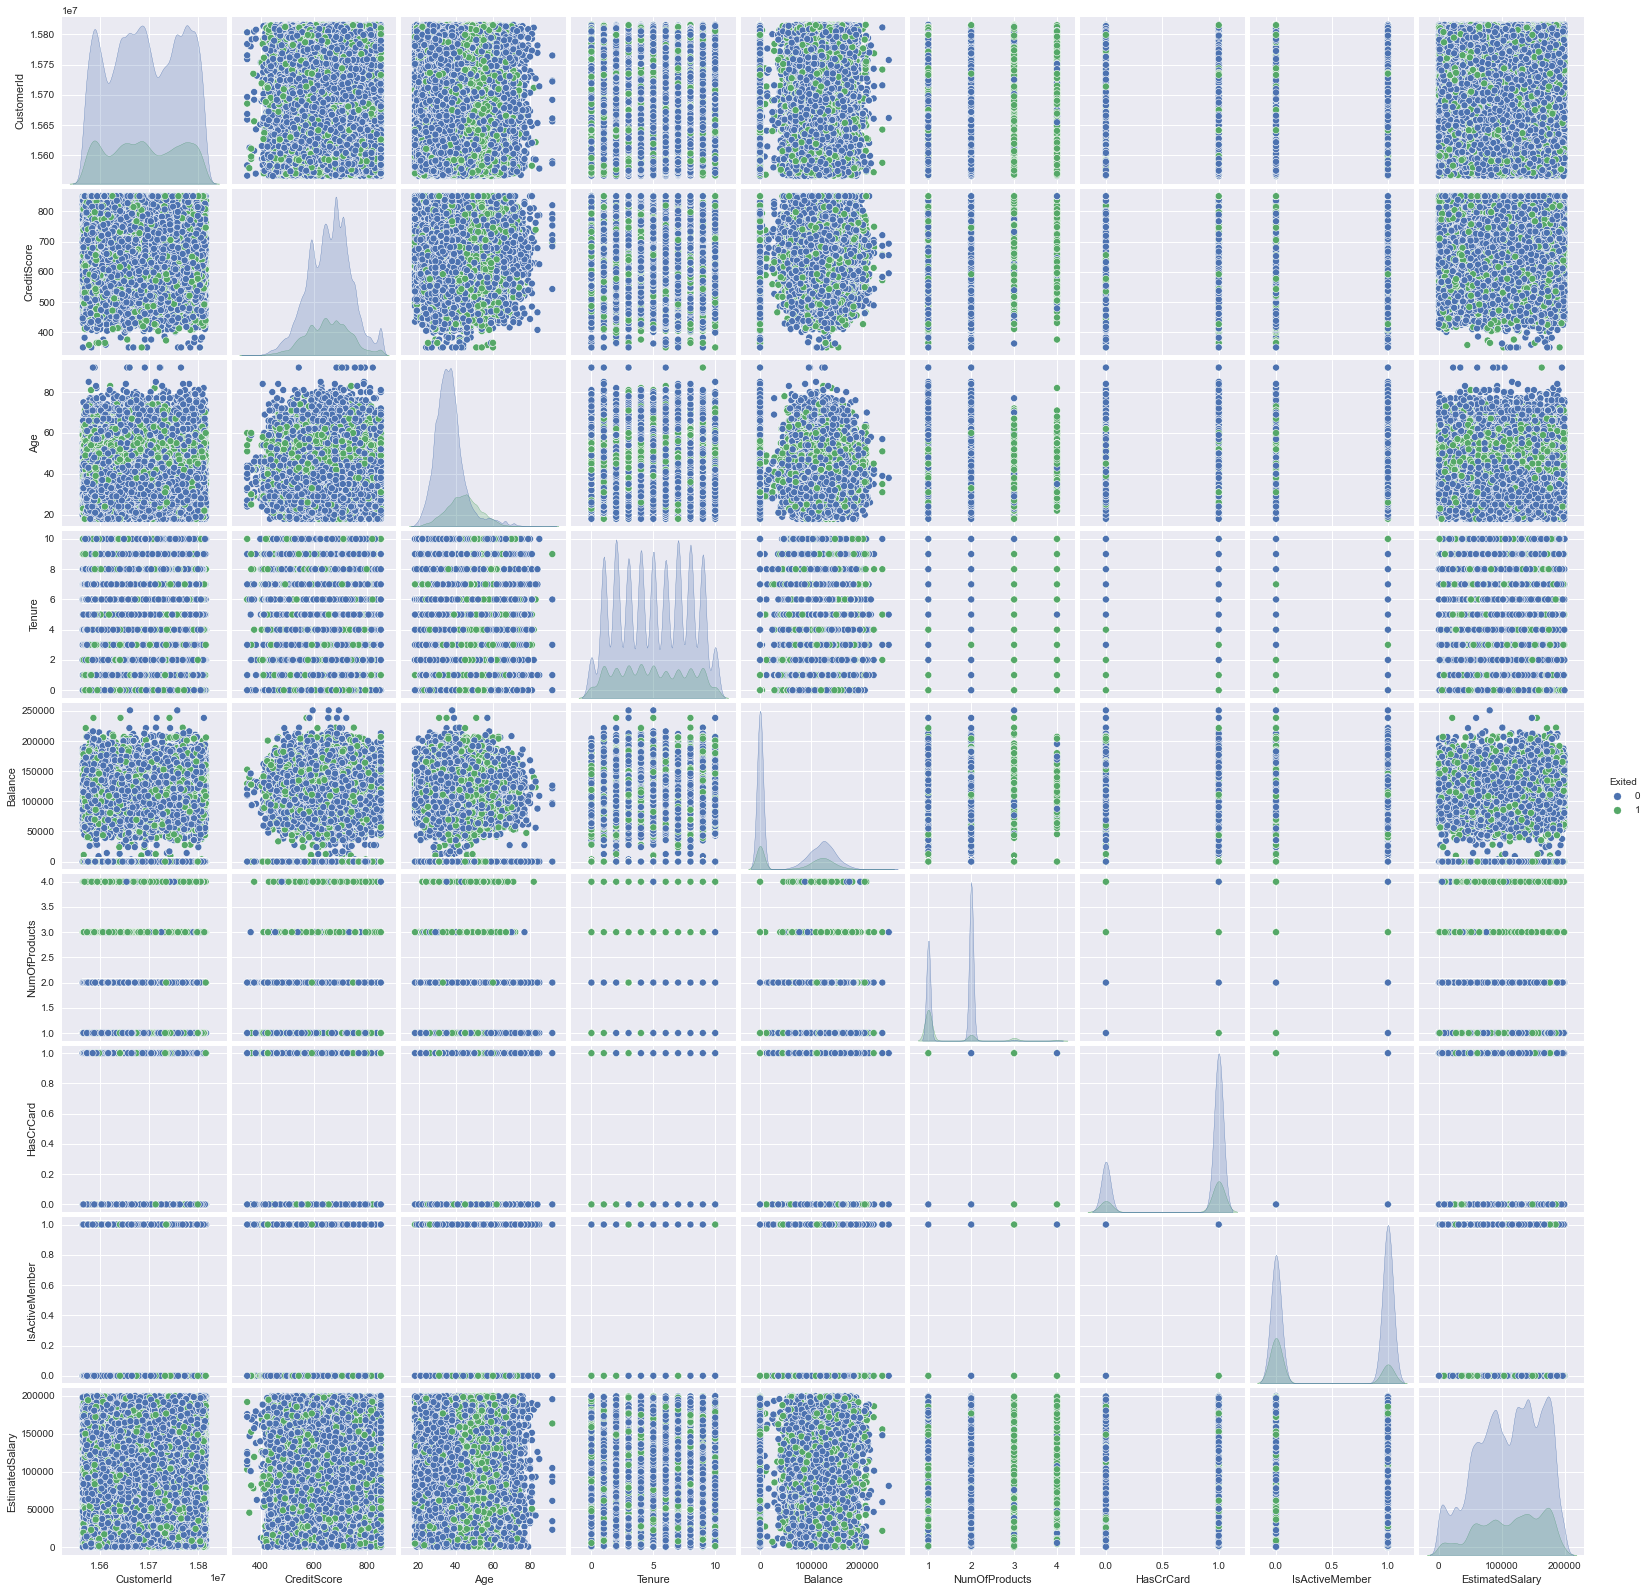

In [28]:
sns.pairplot(df, hue='Exited')

The pairplot is to identify patterns among the different numerical variables in the data while it is being color coded by Exited. The Blue color indicates the customers who stayed and the Green color indicates customers who left.

In [29]:
count_by_country = df['Country'].value_counts()
count_by_country

France     94193
Spain      36209
Germany    34602
Name: Country, dtype: int64

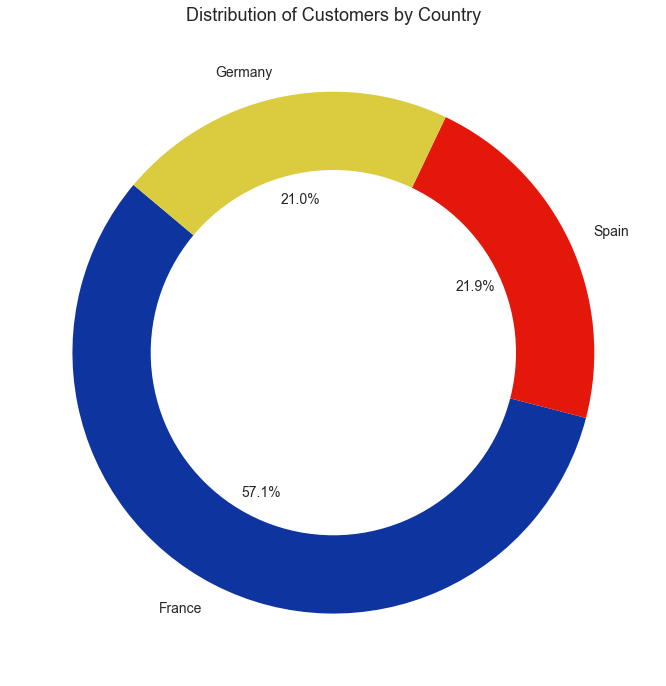

In [30]:
colors = ['#0e34a0','#e3170a','#dacc3e']

plt.figure(figsize=(16, 12))
patches, texts, autotexts = plt.pie(count_by_country, labels=count_by_country.index, colors=colors, 
                                    autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Customers by Country', fontsize=18)

#Increase the font size of the labels
for text in texts:
    text.set_fontsize(14)

#Increase the font size of the percentage numbers
for autotext in autotexts:
    autotext.set_fontsize(14) 

# Draw a circle at the center of pie to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)  

plt.show()

This donut chart is illustrating the distribution of the customers of ABC Bank categorized by country. France constitutes the majority with 57.1% of the chart, which is over half of the pie.
Spain and Germany each make up 21.9% and 21% respectively of the pie.

In [31]:
#df.groupby(['Geography', 'Gender'])['Gender'].count()

In [32]:
exit_counts = df.groupby(['Country', 'Exited']).size().unstack(fill_value=0)
print(exit_counts)

Exited       0      1
Country              
France   78622  15571
Germany  21491  13111
Spain    29976   6233


In [33]:
exit_percentage = exit_counts.div(exit_counts.sum(axis=1), axis=0) * 100
print(exit_percentage)

Exited           0          1
Country                      
France   83.469048  16.530952
Germany  62.109127  37.890873
Spain    82.786048  17.213952


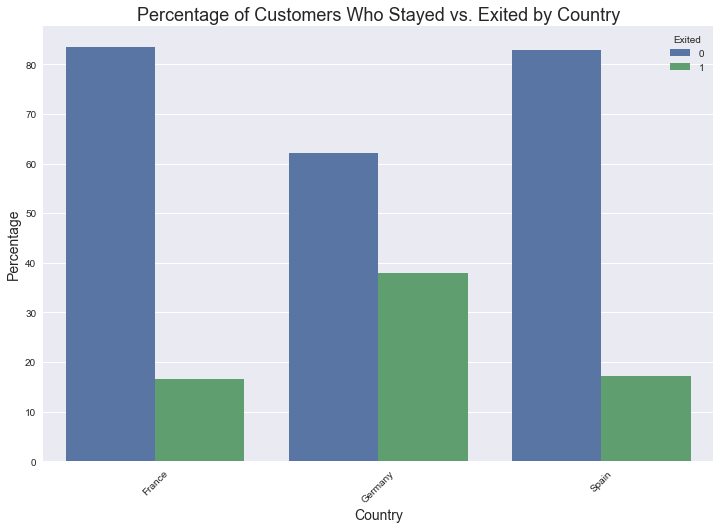

In [34]:
exit_percentage_reset = exit_percentage.reset_index().melt(id_vars='Country', var_name='Exited', value_name='Percentage')

plt.figure(figsize=(12, 8))
sns.barplot(data=exit_percentage_reset, x='Country', y='Percentage', hue='Exited')
plt.title('Percentage of Customers Who Stayed vs. Exited by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.show()

This bar plot visualize the percentage of customers who stayed with ABC Bank versus those who exited, categorized by country. The data is split into two hues representing customers who stayed (indicated by "0") and those who exited (indicated by "1"). Each country shown on the x-axis has two bars representing these two categories.
Looking at the bars we can compare the rate at which customers stay or leave in each country.

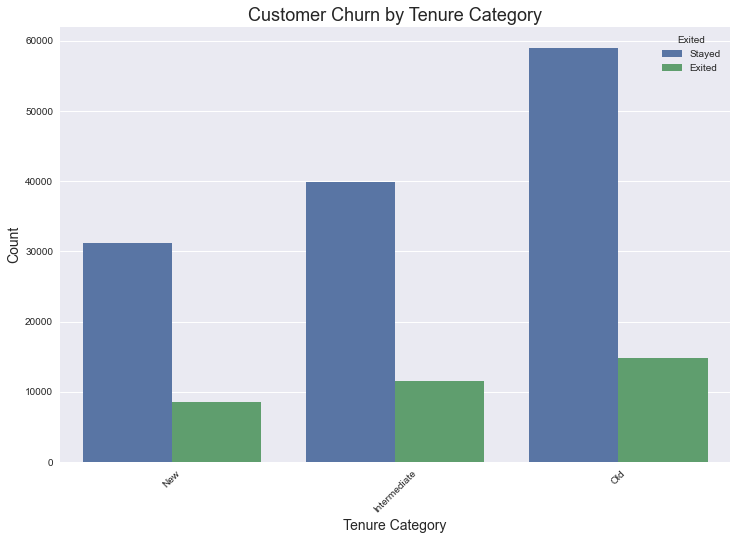

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Tenure Category', hue='Exited', data=df)
plt.title('Customer Churn by Tenure Category', fontsize=18)
plt.xlabel('Tenure Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.xticks(rotation=45)
plt.show()

This countplot shows the customer churn by tenure category. It displays two types of information for each tenure category. The purpose of the chart is to analyze customer retention and loss across different lengths of customer tenure.The New Tenure Category has a lower count of customers who exited compared to those who stayed.

This chart can help ABC Bank understand at which stages of customer tenure there are higher risks of churn, which is valuable for developing targeted customer retention strategies.

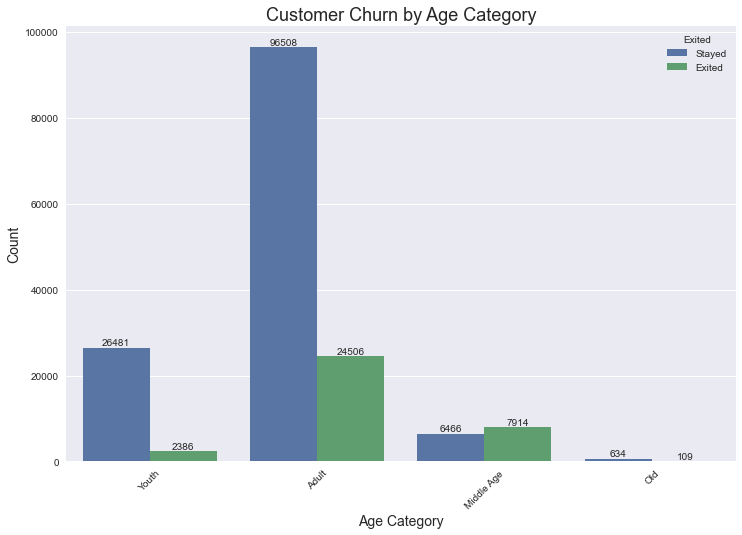

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Age Category', hue='Exited', data=df, order=["Youth", "Adult", "Middle Age", "Old"])  # Assign the Axes object to a variable
plt.title('Customer Churn by Age Category', fontsize=18)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.xticks(rotation=45)

# Annotate each bar
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Adding text to each bar
    # Note: You might want to adjust the positioning of the text slightly for better visibility
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height if pd.notnull(height) else 0), ha='center', va='bottom')

plt.show()

This chart is a count plot showing customer churn categorized by age groups. The Adult age category has a very high number of customers who stayed (96508), with a relatively small number who exited.
For the "Middle Age", it has a count of 6466 for stayed customers which is lower than for those who exited; it implies more customers in this age category left than those who stayed.
The goal is to analyze the differences in customer retention and turnover across different age groups. Such insights could be important for tailoring marketing and retention strategies to specific demographic segments.

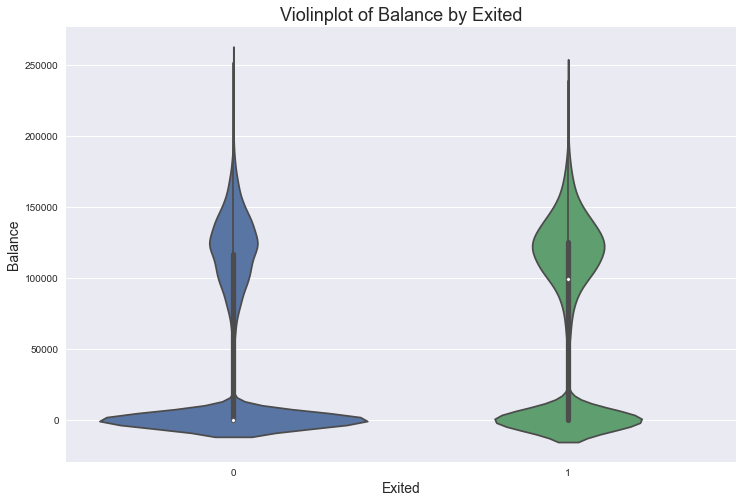

In [37]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = "Exited", y = "Balance", data = df)
plt.title('Violinplot of Balance by Exited', fontsize=18)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Balance', fontsize=14);

In this plot, each "violin" corresponds to one category of Exited variable. The differences between the shapes of the two violins suggest differences in the distributions of the variable plotted on the y-axis, which is labeled "Balance".

The distribution for category "0" seems to be skewed towards the lower balance values, with fewer high balance values.
The distribution for category "1" appears to be more uniform but still has a slight skew towards lower balance values.
Both categories have a long range of balance values, indicating variability within each category.

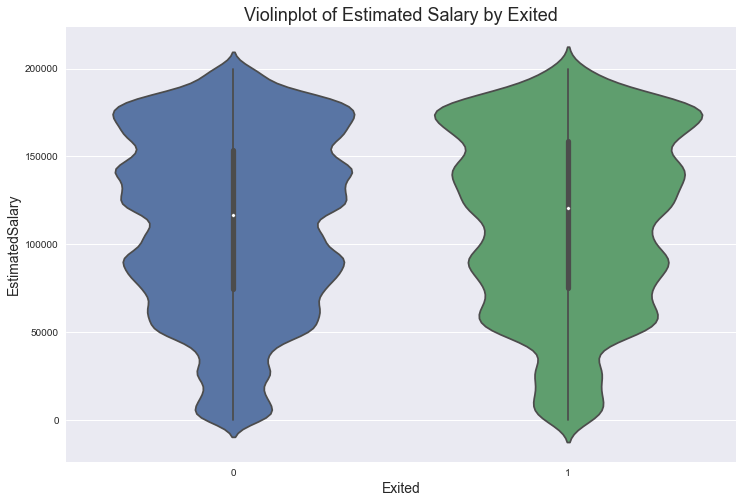

In [38]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = "Exited", y = "EstimatedSalary", data = df)
plt.title('Violinplot of Estimated Salary by Exited', fontsize=18)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('EstimatedSalary', fontsize=14);

Both categories show a wide spread of 'EstimatedSalary' values, with a large range of data.
Neither violin plot appears to have a very pronounced skew, suggesting that for both categories, the 'EstimatedSalary' distribution is relatively symmetrical around the median.
The distribution for category "1" is slightly more pointed at the top and bottom, suggesting there are fewer instances of very low and very high salaries compared to category "0".
This violin plot is helpful for comparing the distribution and density of data across different categories in Exited variable.

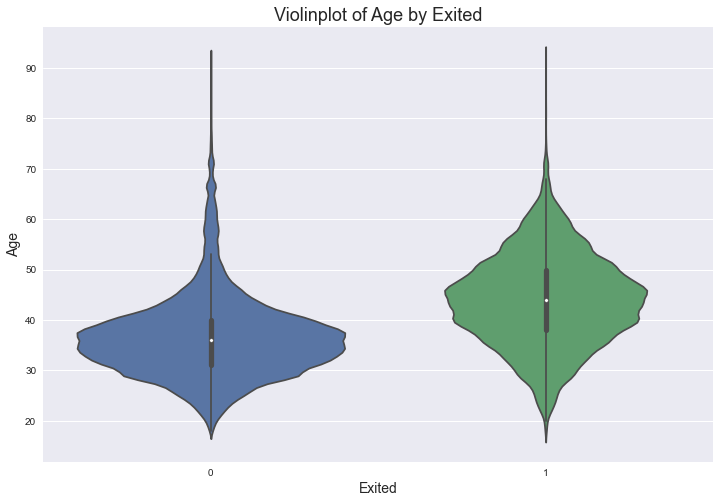

In [39]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = "Exited", y = "Age", data = df)
plt.title('Violinplot of Age by Exited', fontsize=18)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Age', fontsize=14);

This violin plot shows the distribution of ages for two groups, labeled "0" and "1". The width of each shape represents how common different ages are within each group: wider sections mean more people of that age. The white dot in the middle of each violin indicates the most common age (median) for each group. Group "0" has a broader distribution, indicating a greater range of ages, while Group "1" is more concentrated around the median. Both groups have similar age ranges, as shown by the lines extending from the top and bottom of each violin.

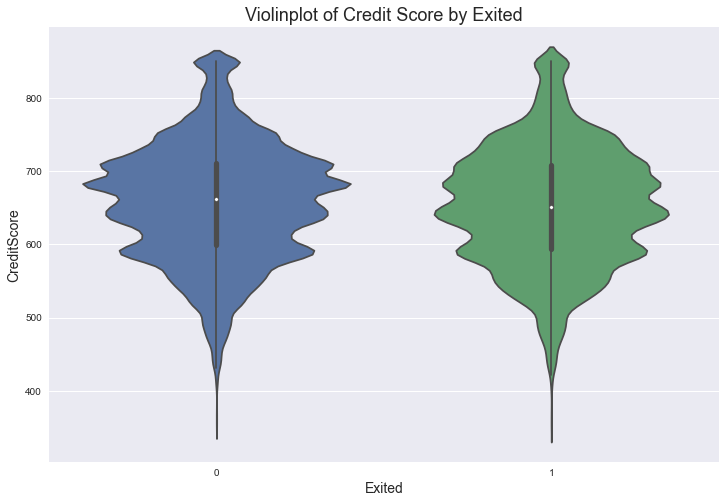

In [40]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = "Exited", y = "CreditScore", data = df)
plt.title('Violinplot of Credit Score by Exited', fontsize=18)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('CreditScore', fontsize=14);

This violin plot shows the distribution of credit scores for two groups, labeled "0" and "1". The shapes represent how many people have different credit scores within each group. The thicker part means more people have that score, and the white dot is the median score for each group. Those who stayed has a broad shape, meaning its people's scores vary a lot. Those who left have narrower shape, so its people's scores are closer together. Both groups cover about the same range of scores, which you can see by the lines stretching from the top and bottom of each violin.

In [41]:
df.columns

Index(['CustomerId', 'CreditScore', 'Country', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age Category', 'Tenure Category'],
      dtype='object')

In [42]:
df.head()

,CustomerId,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Category,Tenure Category
id,,,,,,,,,,,,,,
0,15674932,668,France,Male,33,3,0.00,2,1,0,181449.97,0,Adult,Intermediate
1,15749177,627,France,Male,33,1,0.00,2,1,1,49503.50,0,Adult,New
2,15694510,678,France,Male,40,10,0.00,2,1,0,184866.69,0,Adult,Old
3,15741417,581,France,Male,34,2,148882.54,1,1,1,84560.88,0,Adult,New
4,15766172,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0,Adult,Intermediate


In [43]:
#customers age category distribution by tenure category

age_order = ['Youth', 'Adult', 'Middle Age', 'Old']
df['Age Category'] = pd.Categorical(df['Age Category'], categories=age_order, ordered=True)

cross_tab = pd.crosstab(df['Age Category'], df['Tenure Category'], margins=True, margins_name='Total')
cross_tab

Tenure Category,New,Intermediate,Old,Total
Age Category,,,,
Youth,6851,9006,13010,28867
Adult,29159,37570,54285,121014
Middle Age,3616,4652,6112,14380
Old,175,214,354,743
Total,39801,51442,73761,165004


The table displays the distribution of the bank's customers by age category. It reveals that the majority of the bank's clients are adults. Notably, 54,285 of them are long-standing customers, meaning they have been with the bank for 6 or more years.

In [44]:
#Customers Country distribution by Gender and Exited

pd.crosstab(df['Country'], [df['Gender'],df['Exited']],  margins=True, margins_name='Total')

Gender  Female          Male          Total
Exited       0      1      0      1        
Country                                    
France   30965   9002  47657   6569   94193
Germany   8792   7594  12699   5517   34602
Spain    12012   3505  17964   2728   36209
Total    51769  20101  78320  14814  165004

The largest number of bank customers are from France (94,193), followed by Spain (36,209), and Germany (34,602). Across all regions, there are more customers who have stayed than those who have left. Finally, it would seem that a larger proportion of female customers have left the bank compared to male customers.

In [45]:
#Create dummy variables
dummies_gender = pd.get_dummies(df['Gender'], prefix='gen', drop_first = False)
dummies_geo = pd.get_dummies(df['Country'], prefix='cty', drop_first = False)

#Concat the dummy variables to the main dataset
df = pd.concat([df, dummies_gender, dummies_geo], axis = 1)

In [46]:
df.head()

,CustomerId,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Category,Tenure Category,gen_Female,gen_Male,cty_France,cty_Germany,cty_Spain
id,,,,,,,,,,,,,,,,,,,
0,15674932,668,France,Male,33,3,0.00,2,1,0,181449.97,0,Adult,Intermediate,0,1,1,0,0
1,15749177,627,France,Male,33,1,0.00,2,1,1,49503.50,0,Adult,New,0,1,1,0,0
2,15694510,678,France,Male,40,10,0.00,2,1,0,184866.69,0,Adult,Old,0,1,1,0,0
3,15741417,581,France,Male,34,2,148882.54,1,1,1,84560.88,0,Adult,New,0,1,1,0,0
4,15766172,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0,Adult,Intermediate,0,1,0,0,1


In [48]:
#df.to_csv('Bank Churn Data.csv')

In [48]:
df.drop(columns=['Country','Gender','Age Category','Tenure Category'], inplace=True)

In [49]:
df_model_copy = df.copy()

### Insights

- France not only has the highest number of total customers but also the highest number of customers who have stayed with the bank ('Exited' 0).
- Germany has a notably higher proportion of customers who have exited ('Exited' 1) relative to its total customer base, compared to France and Spain. (total exited in that country/total clients in that country)
- There is a significant number of customers who have stayed with the bank (total 'Exited' 0: 78,320) compared to those who have left (total 'Exited' 1: 14,814).
- A larger proportion of female customers have left the bank compared to male customers.

## Logistics Regression

In [50]:
df.set_index('CustomerId', inplace=True)

In [51]:
#create the target variable
y = df['Exited']
display(y.value_counts())
display(round(y.value_counts(normalize=True),3))

0    130089
1     34915
Name: Exited, dtype: int64

0    0.788
1    0.212
Name: Exited, dtype: float64

In [52]:
#create the feature variables
X = df.drop(['Exited'], axis = 1)
display(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165004 entries, 15674932 to 15732798
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165004 non-null  int64  
 1   Age              165004 non-null  int32  
 2   Tenure           165004 non-null  int64  
 3   Balance          165004 non-null  float64
 4   NumOfProducts    165004 non-null  int64  
 5   HasCrCard        165004 non-null  int32  
 6   IsActiveMember   165004 non-null  int32  
 7   EstimatedSalary  165004 non-null  float64
 8   gen_Female       165004 non-null  uint8  
 9   gen_Male         165004 non-null  uint8  
 10  cty_France       165004 non-null  uint8  
 11  cty_Germany      165004 non-null  uint8  
 12  cty_Spain        165004 non-null  uint8  
dtypes: float64(2), int32(3), int64(3), uint8(5)
memory usage: 10.2 MB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gen_Female,gen_Male,cty_France,cty_Germany,cty_Spain
CustomerId,,,,,,,,,,,,,
15674932,668,33,3,0.00,2,1,0,181449.97,0,1,1,0,0
15749177,627,33,1,0.00,2,1,1,49503.50,0,1,1,0,0
15694510,678,40,10,0.00,2,1,0,184866.69,0,1,1,0,0
15741417,581,34,2,148882.54,1,1,1,84560.88,0,1,1,0,0
15766172,716,33,5,0.00,2,1,1,15068.83,0,1,0,0,1


In [53]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
mm = preprocessing.MinMaxScaler()
rb = preprocessing.RobustScaler()
nm = preprocessing.Normalizer()

In [54]:
#Split the raw data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
display(y_train.head())
X_train.head()

CustomerId
15734008    0
15672447    0
15793345    1
15686964    1
15643575    1
Name: Exited, dtype: int64

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gen_Female,gen_Male,cty_France,cty_Germany,cty_Spain
CustomerId,,,,,,,,,,,,,
15734008,579,67,6,126817.65,2,1,1,26265.18,0,1,0,1,0
15672447,668,37,8,121405.04,1,1,0,136983.77,0,1,0,1,0
15793345,635,43,9,122728.48,2,1,0,143931.35,0,1,0,0,1
15686964,565,52,2,109493.62,1,1,0,188324.01,1,0,0,1,0
15643575,645,38,5,0.00,1,0,0,705.68,1,0,1,0,0


In [56]:
#standardize the data
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

#MinMax scale the data
mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)

#Robust scale the data
rb.fit(X_train)
X_train_rb = rb.transform(X_train)
X_train_rb = pd.DataFrame(X_train_rb, columns=X_train.columns)
X_test_rb = rb.transform(X_test)
X_test_rb = pd.DataFrame(X_test_rb, columns=X_test.columns)

#Normalize the data
nm.fit(X_train)
X_train_nm = nm.transform(X_train)
X_train_nm = pd.DataFrame(X_train_nm, columns=X_train.columns)
X_test_nm = nm.transform(X_test)
X_test_nm = pd.DataFrame(X_test_nm, columns=X_test.columns)

<AxesSubplot:title={'center':'Normalizer'}, xlabel='EstimatedSalary', ylabel='Density'>

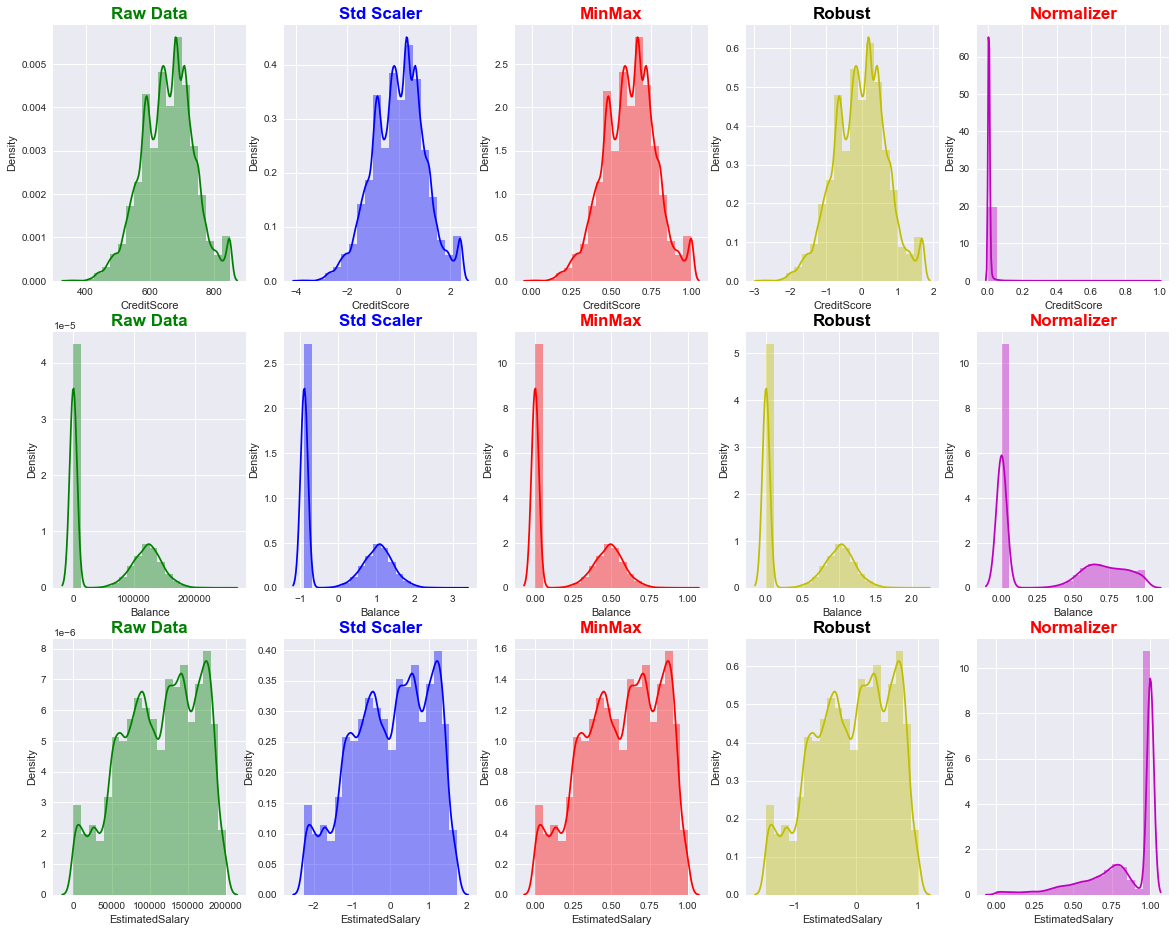

In [57]:
plt.figure(figsize=(20,16))

varFeature = 'CreditScore'
plt.subplot2grid((3, 5), (0, 0))
plt.title('Raw Data', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
sns.distplot(X_train[varFeature], color="g", bins = 20)
plt.subplot2grid((3, 5), (0, 1))
plt.title('Std Scaler', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_sc[varFeature], color="b", bins = 20)
plt.subplot2grid((3, 5), (0, 2))
plt.title('MinMax', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_mm[varFeature], color="r", bins = 20)
plt.subplot2grid((3, 5), (0, 3))
plt.title('Robust', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_rb[varFeature], color="y", bins = 20)
plt.subplot2grid((3, 5), (0, 4))
plt.title('Normalizer', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_nm[varFeature], color="m", bins = 20)


varFeature = 'Balance'
plt.subplot2grid((3, 5), (1, 0))
plt.title('Raw Data', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
sns.distplot(X_train[varFeature], color="g", bins = 20)
plt.subplot2grid((3, 5), (1, 1))
plt.title('Std Scaler', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_sc[varFeature], color="b", bins = 20)
plt.subplot2grid((3, 5), (1, 2))
plt.title('MinMax', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_mm[varFeature], color="r", bins = 20)
plt.subplot2grid((3, 5), (1, 3))
plt.title('Robust', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_rb[varFeature], color="y", bins = 20)
plt.subplot2grid((3, 5), (1, 4))
plt.title('Normalizer', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_nm[varFeature], color="m", bins = 20)


varFeature = 'EstimatedSalary'
plt.subplot2grid((3, 5), (2, 0))
plt.title('Raw Data', fontweight='bold', color = 'green', fontsize='17', horizontalalignment='center')
sns.distplot(X_train[varFeature], color="g", bins = 20)
plt.subplot2grid((3, 5), (2, 1))
plt.title('Std Scaler', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_sc[varFeature], color="b", bins = 20)
plt.subplot2grid((3, 5), (2, 2))
plt.title('MinMax', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_mm[varFeature], color="r", bins = 20)
plt.subplot2grid((3, 5), (2, 3))
plt.title('Robust', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_rb[varFeature], color="y", bins = 20)
plt.subplot2grid((3, 5), (2, 4))
plt.title('Normalizer', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center')
sns.distplot(X_train_nm[varFeature], color="m", bins = 20)

## Modeling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
#set the default properties of the model

model = LogisticRegression(random_state=21)

In [60]:
#fit the model

model.fit(X_train, y_train)

LogisticRegression(random_state=21)

In [61]:
#predict the target variable with the test data

model_pred = model.predict(X_test)
model_prob = model.predict_proba(X_test)
print(model_pred)
model_prob

[0 0 0 ... 0 0 0]


array([[0.90574244, 0.09425756],
       [0.57702823, 0.42297177],
       [0.69054043, 0.30945957],
       ...,
       [0.80510505, 0.19489495],
       [0.85628279, 0.14371721],
       [0.85782956, 0.14217044]])

In [62]:
model_pred = pd.DataFrame(model_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Log'})
model_prob = pd.DataFrame(model_prob)
model_prob = model_prob.rename(columns = {0:'Prob_No', 1:'Prob_Yes'})
display(model_pred.sample(5, random_state=244))
model_prob.sample(5, random_state=244)

,Predict_Log
2303,0
27276,0
42336,0
26329,0
19977,0


,Prob_No,Prob_Yes
2303,0.864926,0.135074
27276,0.781693,0.218307
42336,0.819268,0.180732
26329,0.874351,0.125649
19977,0.789419,0.210581


In [63]:
#create df_result

df_model_results = pd.concat([X_test[['CreditScore', 'Balance', 'EstimatedSalary']], y_test], axis = 1 )
display(model_pred.head())
df_model_results.head()

,Predict_Log
0,0
1,0
2,0
3,0
4,0


,CreditScore,Balance,EstimatedSalary,Exited
CustomerId,,,,
15731543,695,0.00,79814.80,0
15671087,683,0.00,73857.94,1
15587419,635,137367.94,84760.80,0
15674733,748,142703.40,136909.23,1
15595557,686,0.00,107615.43,0


In [64]:
df_model_results = df_model_results.reset_index()
display(df_model_results.head())
model_pred.head()

,CustomerId,CreditScore,Balance,EstimatedSalary,Exited
0,15731543,695,0.00,79814.80,0
1,15671087,683,0.00,73857.94,1
2,15587419,635,137367.94,84760.80,0
3,15674733,748,142703.40,136909.23,1
4,15595557,686,0.00,107615.43,0


,Predict_Log
0,0
1,0
2,0
3,0
4,0


In [65]:
df_model_results = pd.concat([df_model_results, model_pred, model_prob], axis = 1 )
display(df_model_results.info())
df_model_results.sample(10, random_state=244)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49502 entries, 0 to 49501
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       49502 non-null  int64  
 1   CreditScore      49502 non-null  int64  
 2   Balance          49502 non-null  float64
 3   EstimatedSalary  49502 non-null  float64
 4   Exited           49502 non-null  int64  
 5   Predict_Log      49502 non-null  int64  
 6   Prob_No          49502 non-null  float64
 7   Prob_Yes         49502 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.0 MB


None

,CustomerId,CreditScore,Balance,EstimatedSalary,Exited,Predict_Log,Prob_No,Prob_Yes
2303,15774872,663,0.00,136349.55,0,0,0.864926,0.135074
27276,15641490,651,164450.07,186868.21,0,0,0.781693,0.218307
42336,15794868,544,0.00,177772.03,1,0,0.819268,0.180732
26329,15744008,790,117899.21,109618.01,1,0,0.874351,0.125649
19977,15771742,641,116662.96,176913.42,0,0,0.789419,0.210581
11491,15592388,667,127555.82,173976.13,1,0,0.649211,0.350789
31835,15750099,731,0.00,84749.96,0,0,0.902580,0.097420
44606,15644788,646,129299.28,73107.60,1,0,0.725332,0.274668
3480,15767129,635,121730.49,142963.29,0,0,0.824551,0.175449
125,15764293,581,141796.63,82744.88,0,0,0.597308,0.402692


In [66]:
#checking the accuracy score

score = model.score(X_test, y_test)
print(score)

0.7884125893903277


In [67]:
#checking the confusion matrix

print(confusion_matrix(y_test, model_pred))

[[37736  1343]
 [ 9131  1292]]


In [68]:
display(y_test.value_counts())
round(y_test.value_counts(normalize=True),5)

0    39079
1    10423
Name: Exited, dtype: int64

0    0.78944
1    0.21056
Name: Exited, dtype: float64

In [69]:
df_cm = pd.DataFrame(confusion_matrix(y_test, model_pred), columns = ['Pred_No', 'Pred_Yes'], index = ['Actual_No', 'Actual_Yes'])
df_cm

,Pred_No,Pred_Yes
Actual_No,37736,1343
Actual_Yes,9131,1292


In [70]:
#Set variables for type
varTN = df_cm.iloc[0,0] #1st row and 1st column
varFP = df_cm.iloc[0,1] # 1st row and 2nd column
varFN = df_cm.iloc[1,0] #2nd row and 1st column
varTP = df_cm.iloc[1,1] #2nd row and 2nd column

print ('TN: ' + str(varTN) + ' - FP: ' + str(varFP) + ' - FN: ' + str(varFN) + ' - TP: ' + str(varTP))

TN: 37736 - FP: 1343 - FN: 9131 - TP: 1292


In [71]:
#Accuracy score calculation

(varTP + varTN) / (varTP + varTN + varFP + varFN)

0.7884125893903277

              precision    recall  f1-score   support

          No     0.8052    0.9656    0.8781     39079
         Yes     0.4903    0.1240    0.1979     10423

    accuracy                         0.7884     49502
   macro avg     0.6477    0.5448    0.5380     49502
weighted avg     0.7389    0.7884    0.7349     49502



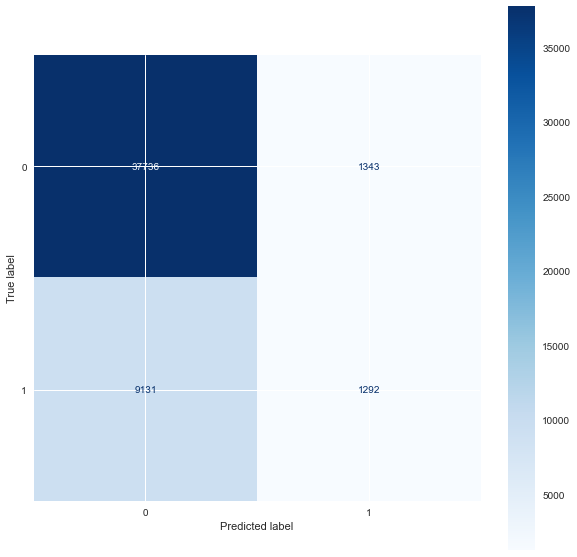

In [72]:
#visualize confusion matrix

from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_test, model_pred, target_names=['No', 'Yes'], digits=4))

fig, ax = plt.subplots(figsize=(10, 10))
confmat = plot_confusion_matrix(model, X_test, y_test, cmap="Blues", values_format='d', ax=ax)

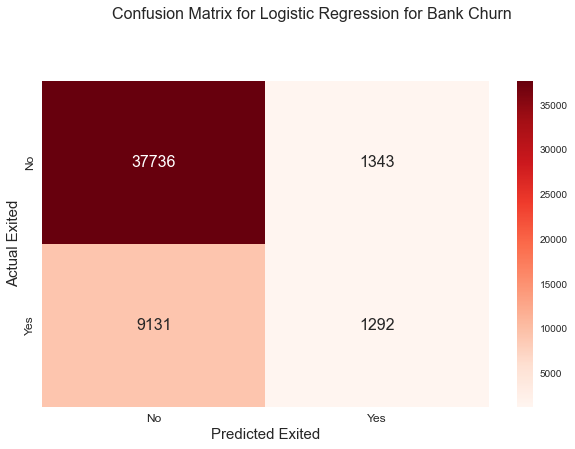

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 6))
fig.suptitle('Confusion Matrix for Logistic Regression for Bank Churn', 
             fontsize=16, y=1.05)
ax = plt.subplot()
sns.heatmap(df_cm, annot=True, cmap="Reds", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted Exited', fontsize=15)
ax.set_ylabel('Actual Exited', fontsize=15)
ax.xaxis.set_ticklabels(['No', 'Yes'], fontsize=12)
ax.yaxis.set_ticklabels(['No', 'Yes'], fontsize=12, va='center')
plt.show()

In [74]:
#view the precision and recall scores

from sklearn.metrics import precision_score, recall_score

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)
print('')
precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

Recall Score: 0.1240

Precision Score: 0.4903


## Using Logistics Regression with Scaled Data

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [76]:
scale = [(X_train, X_test, 'Raw'), (X_train_sc, X_test_sc, 'StdScale'), (X_train_mm, X_test_mm, 'MinMax'), 
         (X_train_rb, X_test_rb, 'Robust'), (X_train_nm, X_test_nm, 'Normal')]


model = LogisticRegression(random_state=21, max_iter=1000)

#Creates a DataFrame for aggregattion of results
df_results_scaled = pd.DataFrame(y_test).reset_index()

for vartrain, vartest, name in scale:
    model.fit(vartrain, y_train)
    score = model.score(vartest, y_test)
    
    model_pred = model.predict(vartest)
    df_model_pred = pd.DataFrame(model_pred, columns=[name])
    
    df_results_scaled = pd.concat([df_results_scaled, df_model_pred], axis=1)
    
    print('----------------')
    print('Results: ' + name)
    display(round(score, 6))
    print(confusion_matrix(y_test, model_pred))

df_results_scaled.sample(10, random_state=102)

----------------
Results: Raw


0.788413

[[37736  1343]
 [ 9131  1292]]
----------------
Results: StdScale


0.836047

[[37365  1714]
 [ 6402  4021]]
----------------
Results: MinMax


0.836128

[[37378  1701]
 [ 6411  4012]]
----------------
Results: Robust


0.836087

[[37366  1713]
 [ 6401  4022]]
----------------
Results: Normal


0.789443

[[39079     0]
 [10423     0]]


,CustomerId,Exited,Raw,StdScale,MinMax,Robust,Normal
9432,15631451,0,0,0,0,0,0
38963,15744041,0,0,0,0,0,0
40729,15623202,0,0,0,0,0,0
13783,15623972,0,0,0,0,0,0
14670,15749103,0,0,0,0,0,0
23844,15778155,1,0,0,0,0,0
37435,15718216,0,0,0,0,0,0
41227,15591257,0,0,0,0,0,0
8975,15666884,0,0,0,0,0,0
44587,15750056,0,0,0,0,0,0


In [77]:
#import some defined functions

import def_ModelTest
print(dir(def_ModelTest)) 

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'modeltraintest', 'shorttraintest']


In [78]:
#import another function
import def_confusion
print(dir(def_confusion))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'confusionmatrix_decision', 'confusionmatrix_optimal']


In [79]:
scale = [(X_train, X_test, 'Raw'), (X_train_sc, X_test_sc, 'StdScale'), (X_train_mm, X_test_mm, 'MinMax'), 
         (X_train_rb, X_test_rb, 'Robust'), (X_train_nm, X_test_nm, 'Normal')]

for vartrain, vartest, name in scale:
    print('                                                                                                                                                                                     ')
    print('XXXXXX ASSESSING MODEL ACCURACY WITH THE ' + name + ' TEST DATA FOR XXXXXXXXX')
    model = LogisticRegression(random_state=21)
    def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

                                                                                                                                                                                     
XXXXXX ASSESSING MODEL ACCURACY WITH THE Raw TEST DATA FOR XXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37736  1343]
 [ 9131  1292]]

Accuracy Score: 0.7884
Recall Score: 0.1240
Precision Score: 0.4903
ROC AUC Score: 0.7154

                                                                                                                                                                                     
XXXXXX ASSESSING MODEL ACCURACY WITH THE StdScale TEST DATA FOR XXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37365  1714]
 [ 6402  4021]]

Accuracy Score: 0.8360
Recall Score: 0.3858
Precision Score: 0.7011
ROC AUC Score: 0.8206

                                                                                                                                                 

A function was imported to automate the process of the scaled data along with the raw data in order to compare the results of these data. The robust and standard scaler results are quite similar. The result is compared based on the accuracy, precision and recall of each data. And based on these, the standard scaler data produced a model that we can work with.

## Finetune the model to find optimal result

In [80]:
#parameters set to default properties to assess performance

vartrain = X_train_sc
vartest = X_test_sc
model = LogisticRegression(penalty='l2', solver='lbfgs', C=1, class_weight=None, random_state=21)

def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37365  1714]
 [ 6402  4021]]

Accuracy Score: 0.8360
Recall Score: 0.3858
Precision Score: 0.7011
ROC AUC Score: 0.8206



In [81]:
#Set penalty to 'elasticnet', solver to 'saga' and l1_ratio=1

vartrain = X_train_sc
vartest = X_test_sc
model = LogisticRegression(random_state=21, penalty='elasticnet', solver='saga', l1_ratio=1)

def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37365  1714]
 [ 6401  4022]]

Accuracy Score: 0.8361
Recall Score: 0.3859
Precision Score: 0.7012
ROC AUC Score: 0.8206



#### finetuning for optimal c

In [82]:
#use for loop to set C
C_penalty = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

vartrain = X_train_sc
vartest = X_test_sc

for c in C_penalty:
    print('----------------------')
    vartitle = "Model with C: " + str(c) 
    varC_penalty = c
    model = LogisticRegression(random_state=21, C=varC_penalty)
    print(vartitle)
    print('')
    def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

----------------------
Model with C: 0.001

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37558  1521]
 [ 6653  3770]]

Accuracy Score: 0.8349
Recall Score: 0.3617
Precision Score: 0.7125
ROC AUC Score: 0.8208

----------------------
Model with C: 0.01

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37398  1681]
 [ 6432  3991]]

Accuracy Score: 0.8361
Recall Score: 0.3829
Precision Score: 0.7036
ROC AUC Score: 0.8206

----------------------
Model with C: 0.1

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37369  1710]
 [ 6404  4019]]

Accuracy Score: 0.8361
Recall Score: 0.3856
Precision Score: 0.7015
ROC AUC Score: 0.8206

----------------------
Model with C: 1

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37365  1714]
 [ 6402  4021]]

Accuracy Score: 0.8360
Recall Score: 0.3858
Precision Score: 0.7011
ROC AUC Score: 0.8206

----------------------
Model with C: 10

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37365  1714]
 [ 6402  4021]]

Accuracy Sc

### using grid search to find optimal hyperparameters

In [83]:
#Using grid search to find optimal hyperparameters

#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

grid={"C":[0.001, 0.01, 0.1, 1, 5, 10, 100], "penalty":["l1","l2"], 
     "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}], "solver":['lbfgs', 'liblinear']}
logreg=LogisticRegression(random_state=21)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8333708683605663


In [84]:
#using the best hyperparameters based on grid search

#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = None, penalty = 'l2', solver = 'lbfgs')


def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37398  1681]
 [ 6432  3991]]

Accuracy Score: 0.8361
Recall Score: 0.3829
Precision Score: 0.7036
ROC AUC Score: 0.8206



XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.836108

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[37398  1681]
 [ 6432  3991]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     39079
           1       0.70      0.38      0.50     10423

    accuracy                           0.84     49502
   macro avg       0.78      0.67      0.70     49502
weighted avg       0.82      0.84      0.82     49502


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



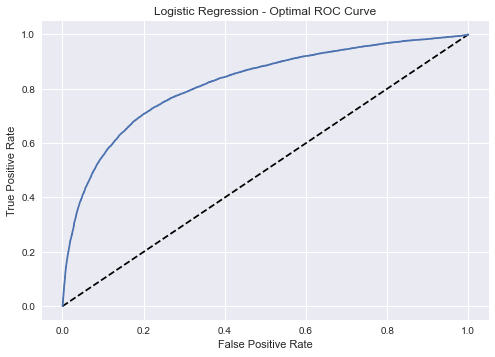

ROC AUC Score: 0.8206

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.83230163 0.83507207 0.83402597 0.83207792 0.83320346]

CV ROC AUC:
[0.81272146 0.81634888 0.81738947 0.81735375 0.81912699]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [85]:
vartrain = X_train_sc
vartest = X_test_sc

model.fit(vartrain, y_train)

#Predict with the model
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)


#Assess with the model
score = model.score(vartest, y_test)

print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
print(round(score, 6))
print("")


print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
cm_opt = confusion_matrix(y_test, model_pred)
print(cm_opt)
print("")


print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
print(classification_report(y_test, model_pred))
print('')


print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
print('')
y_pred_prob = model.predict_proba(vartest)[:,1]

fpr_opt, tpr_opt, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_opt, tpr_opt, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Optimal ROC Curve')
plt.show();

# calculate roc curve
y_pred_prob = model.predict_proba(vartest)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)
print('')


print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
print('')
cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
scoring='accuracy')
print('CV Accuracy Scores:')
print(cv_scores)
print('')
cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
scoring='roc_auc')
print('CV ROC AUC:')
print(cv_rocauc)


print('')
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

The recall score is low. Let's finetune the class weight and see what our decision model looks

### Decision Model

In [86]:
cw = [None, {0:1, 1:1}, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.2}, {0:1, 1:2.3}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5},{0:1, 1:5}, {0:1, 1:5.5},{0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train_sc
vartest = X_test_sc

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = LogisticRegression(random_state=21, C=0.01, penalty = 'l2', solver = 'lbfgs', class_weight=varcw)
    print(vartitle)
    print('')
    def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37398  1681]
 [ 6432  3991]]

Accuracy Score: 0.8361
Recall Score: 0.3829
Precision Score: 0.7036
ROC AUC Score: 0.8206

----------------------
Model with Class Weight: {0: 1, 1: 1}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37398  1681]
 [ 6432  3991]]

Accuracy Score: 0.8361
Recall Score: 0.3829
Precision Score: 0.7036
ROC AUC Score: 0.8206

----------------------
Model with Class Weight: balanced

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[29631  9448]
 [ 2665  7758]]

Accuracy Score: 0.7553
Recall Score: 0.7443
Precision Score: 0.4509
ROC AUC Score: 0.8214

----------------------
Model with Class Weight: {0: 1, 1: 1.5}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[35967  3112]
 [ 5193  5230]]

Accuracy Score: 0.8322
Recall Score: 0.5018
Precision Score: 0.6269
ROC AUC Score: 0.8211

----------------------
Model with Class Weight: {0: 1, 1: 2}

XXXX

#### Based on the analysis of the precision/recall and accuracy scores, the class weight of 0:1, 1:5 is chosen to be the decision mdel

In [87]:
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, penalty = 'l2', solver = 'lbfgs', class_weight={0: 1, 1: 5})


def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[26361 12718]
 [ 2033  8390]]

Accuracy Score: 0.7020
Recall Score: 0.8050
Precision Score: 0.3975
ROC AUC Score: 0.8213



Accuracy Score: 0.7020
Recall Score: 0.8050
Precision Score: 0.3975

[[26361 12718]
 [ 2033  8390]]


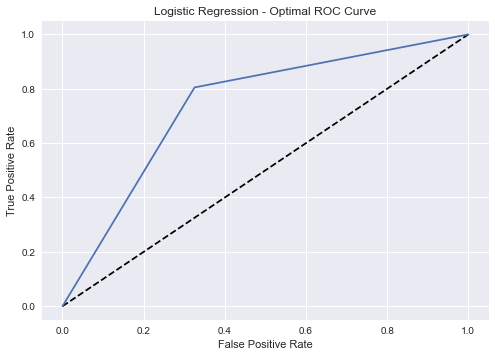

In [88]:
vartrain = X_train_sc
vartest = X_test_sc
model = LogisticRegression(random_state=21, C=0.01, penalty = 'l2', solver = 'lbfgs', class_weight={0: 1, 1: 5})

def_confusion.confusionmatrix_decision(vartrain, vartest, y_train, y_test, model)

In [89]:
confusion_matrix(y_test, model_pred)

array([[37398,  1681],
       [ 6432,  3991]], dtype=int64)

Accuracy Score: 0.7020
Recall Score: 0.8050
Precision Score: 0.3975

[[26361 12718]
 [ 2033  8390]]


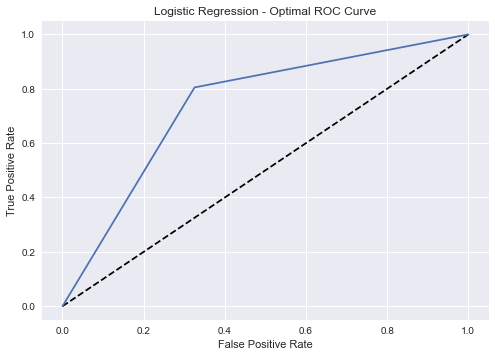

In [90]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, penalty = 'l2', solver = 'lbfgs', class_weight={0: 1, 1: 5})

#Assess with the model
model.fit(vartrain, y_train)

#Predict with the model
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)

score = model.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)
print("")
cm_dec = confusion_matrix(y_test, model_pred)
print(cm_dec)

fpr_dec, tpr_dec, thresholds = roc_curve(y_test, model_pred)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_dec, tpr_dec, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Optimal ROC Curve')
plt.show()

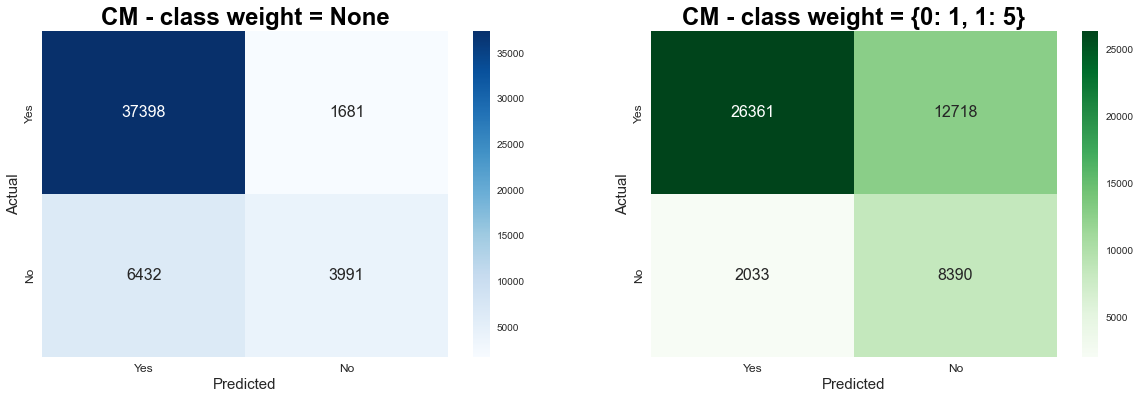

In [91]:
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('CM - class weight = None', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_opt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('Actual', fontsize=15)
chart.xaxis.set_ticklabels(['Yes', 'No'], fontsize=12)
chart.yaxis.set_ticklabels(['Yes', 'No'], fontsize=12, va='center')


plt.subplot(122)
plt.title('CM - class weight = {0: 1, 1: 5}', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dec, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('Actual', fontsize=15)
chart.xaxis.set_ticklabels(['Yes', 'No'], fontsize=12)
chart.yaxis.set_ticklabels(['Yes', 'No'], fontsize=12, va='center');

### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.86041

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[36986  2093]
 [ 4817  5606]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     39079
           1       0.73      0.54      0.62     10423

    accuracy                           0.86     49502
   macro avg       0.81      0.74      0.77     49502
weighted avg       0.85      0.86      0.85     49502


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



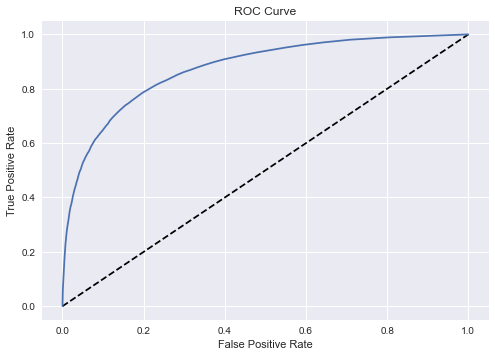

ROC AUC Score: 0.8745

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.85675945 0.85961647 0.85766234 0.85831169 0.85761905]

CV ROC AUC:
[0.87071706 0.87366798 0.8713384  0.87273739 0.87267523]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [93]:
#run a random forest classifier with default parameters

vartrain = X_train
vartest = X_test
model = RandomForestClassifier(random_state=21)

def_ModelTest.modeltraintest(vartrain, vartest, y_train, y_test, model)

In [94]:
#short default model run

vartrain = X_train
vartest = X_test
model = RandomForestClassifier(random_state=21)

def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[36986  2093]
 [ 4817  5606]]

Accuracy Score: 0.8604
Recall Score: 0.5378
Precision Score: 0.7281
ROC AUC Score: 0.8745



### Finetune the model to find the optimal model

iteration 6 done. Accuracy = 0.855137166175104
iteration 8 done. Accuracy = 0.8629550321199143
iteration 10 done. Accuracy = 0.8637832814835764
iteration 12 done. Accuracy = 0.8651569633550159
iteration 14 done. Accuracy = 0.8645307260312715
iteration 16 done. Accuracy = 0.863985293523494
iteration 17 done. Accuracy = 0.8632378489757989
iteration 18 done. Accuracy = 0.8627126176720132
iteration 19 done. Accuracy = 0.8626924164680215
iteration 20 done. Accuracy = 0.8623489960001616
iteration 21 done. Accuracy = 0.8622479899802028
iteration 22 done. Accuracy = 0.8610965213526727
iteration 23 done. Accuracy = 0.8607733020888045
iteration 30 done. Accuracy = 0.860227869581027


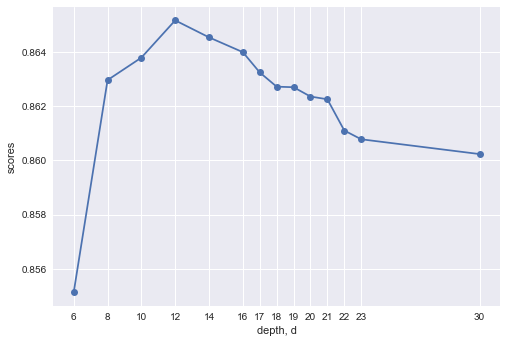

In [95]:
#Chose to use a list instead of a rnage
depth = [6, 8, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 30]

#Creates an empty list
scores = []

for d in depth:
    classifier=RandomForestClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

From the iteration, the max depth of 12 has the highest accuracy score

In [96]:
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=12, random_state=21)

def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37364  1715]
 [ 4960  5463]]

Accuracy Score: 0.8652
Recall Score: 0.5241
Precision Score: 0.7611
ROC AUC Score: 0.8897



iteration 1 done. Accuracy = 0.85647044563856
iteration 2 done. Accuracy = 0.8635408670356753
iteration 3 done. Accuracy = 0.8651569633550159
iteration 4 done. Accuracy = 0.8648943477031231
iteration 5 done. Accuracy = 0.8647529392751808
iteration 6 done. Accuracy = 0.8648741464991313
iteration 7 done. Accuracy = 0.864732738071189
iteration 8 done. Accuracy = 0.8650963597430407
iteration 9 done. Accuracy = 0.8643893176033292
iteration 10 done. Accuracy = 0.8640054947274858
iteration 11 done. Accuracy = 0.8637226778716012
iteration 12 done. Accuracy = 0.8634196598117247


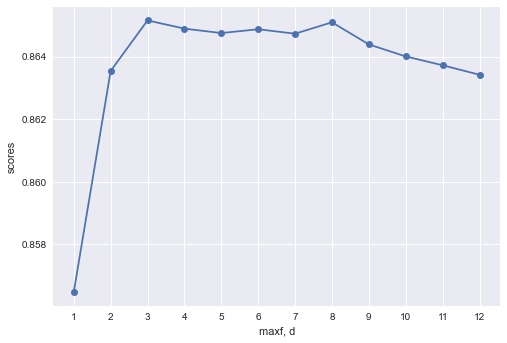

In [97]:
#finetuning for optimal max features

figsize=(20, 5)
maxf = range(1,13)
scores = []

for d in maxf:
    classifier = RandomForestClassifier(max_depth=12, max_features=d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(maxf, scores, '-o')
plt.xlabel('maxf, d')
plt.ylabel('scores')
plt.xticks(maxf)
plt.show()

The highest accuracy from the assigned range of numbers was reached when max features was set at 3

iteration 1 done. Accuracy = 0.8436426811037938
iteration 20 done. Accuracy = 0.8639246899115187
iteration 50 done. Accuracy = 0.8649347501111067
iteration 100 done. Accuracy = 0.8651569633550159
iteration 150 done. Accuracy = 0.8656417922508182
iteration 500 done. Accuracy = 0.8651569633550159


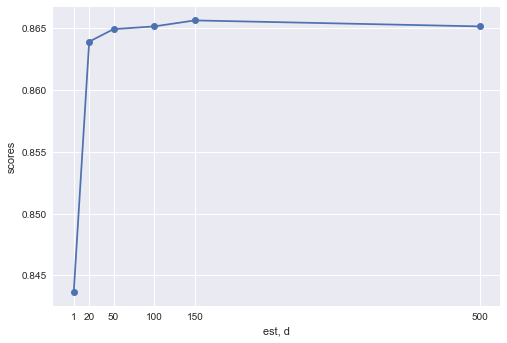

In [98]:
#finentuning for the optimal number of estimators

figsize=(20, 5)
est = [1, 20, 50, 100, 150, 500]
scores = []

for d in est:
    classifier=RandomForestClassifier(max_depth = 12, max_features = 3, n_estimators = d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(est, scores, '-o')
plt.xlabel('est, d')
plt.ylabel('scores')
plt.xticks(est)
plt.show()

The difference between estimator set at 50 and 150 is 0.0007 which is minimal. I would opt for 50 number of estimators.

In [99]:
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 12, max_features = 3, n_estimators = 50, random_state=21)

def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37392  1687]
 [ 4999  5424]]

Accuracy Score: 0.8649
Recall Score: 0.5204
Precision Score: 0.7628
ROC AUC Score: 0.8891



In [100]:
#use a for loop to determine the optimal class weight

cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, 
      {0:1, 1:20}, {0:1, 1:25}, {0:1, 1:30}, {0:1, 1:50}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = RandomForestClassifier(max_depth = 12, max_features = 3, n_estimators = 50, class_weight=varcw)
    print(vartitle)
    print('')
    def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[37297  1782]
 [ 4924  5499]]

Accuracy Score: 0.8645
Recall Score: 0.5276
Precision Score: 0.7553
ROC AUC Score: 0.8895

----------------------
Model with Class Weight: balanced

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[33158  5921]
 [ 2474  7949]]

Accuracy Score: 0.8304
Recall Score: 0.7626
Precision Score: 0.5731
ROC AUC Score: 0.8882

----------------------
Model with Class Weight: {0: 1, 1: 2}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[35741  3338]
 [ 3617  6806]]

Accuracy Score: 0.8595
Recall Score: 0.6530
Precision Score: 0.6709
ROC AUC Score: 0.8890

----------------------
Model with Class Weight: {0: 1, 1: 3}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[34223  4856]
 [ 2851  7572]]

Accuracy Score: 0.8443
Recall Score: 0.7265
Precision Score: 0.6093
ROC AUC Score: 0.8885

----------------------
Model with Class Weight: {0: 1, 1: 5}

XXXXXX

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.803745

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[31344  7735]
 [ 1980  8443]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     39079
           1       0.52      0.81      0.63     10423

    accuracy                           0.80     49502
   macro avg       0.73      0.81      0.75     49502
weighted avg       0.85      0.80      0.82     49502


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



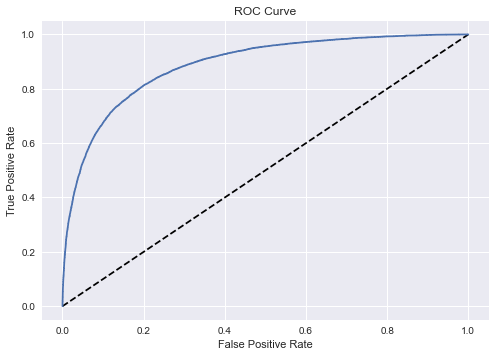

ROC AUC Score: 0.8866

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.80373144 0.81065755 0.80411255 0.80424242 0.80363636]

CV ROC AUC:
[0.87843813 0.88108382 0.88209629 0.88196892 0.88206886]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [101]:
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 12, max_features = 3, n_estimators = 50, class_weight={0: 1, 1: 5})

def_ModelTest.modeltraintest(vartrain, vartest, y_train, y_test, model)

### Random Search

In [105]:
from sklearn.model_selection import RandomizedSearchCV

vartrain = X_train
vartest = X_test



grid={"criterion": ['gini', 'entropy'], "max_depth" : [10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 30],
      "n_estimators" : [20, 50], "max_features" : [5,7,9,10,11,12,13,14],
      "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, 
      {0:1, 1:20}, {0:1, 1:25}, {0:1, 1:30}, {0:1, 1:50}, {0:1, 1:100}]}
model_random = RandomForestClassifier(random_state=21)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :", model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'n_estimators': 50, 'max_features': 11, 'max_depth': 18, 'criterion': 'gini', 'class_weight': None}
accuracy : 0.8576128504772285


### Optimal Random Forest Model - Using the hyperparameters from random search

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.85944

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[36872  2207]
 [ 4751  5672]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     39079
           1       0.72      0.54      0.62     10423

    accuracy                           0.86     49502
   macro avg       0.80      0.74      0.77     49502
weighted avg       0.85      0.86      0.85     49502


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



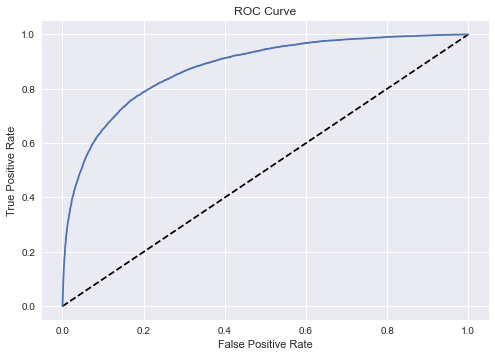

ROC AUC Score: 0.8768

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.85649972 0.85927016 0.85666667 0.85839827 0.85722944]

CV ROC AUC:
[0.87180323 0.87411828 0.87205538 0.87331959 0.87347296]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [106]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model = RandomForestClassifier(max_depth = 18, max_features = 11, n_estimators = 50, class_weight=None, criterion = 'gini', random_state=21)

def_ModelTest.modeltraintest(vartrain, vartest, y_train, y_test, model)

### Decision Model for Random Forest

In [110]:
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:7.5}, {0:1, 1:10}, {0:1, 1:25}, {0:1, 1:35}, {0:1, 1:50}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    #Set the model properties
    model = RandomForestClassifier(max_depth = 18, max_features = 11, n_estimators = 50, 
                                   class_weight=varcw, criterion = 'gini', random_state=21)
    print(vartitle)
    print('')
    def_ModelTest.shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[36872  2207]
 [ 4751  5672]]

Accuracy Score: 0.8594
Recall Score: 0.5442
Precision Score: 0.7199
ROC AUC Score: 0.8768

----------------------
Model with Class Weight: balanced

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[35980  3099]
 [ 4068  6355]]

Accuracy Score: 0.8552
Recall Score: 0.6097
Precision Score: 0.6722
ROC AUC Score: 0.8742

----------------------
Model with Class Weight: {0: 1, 1: 2}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[36528  2551]
 [ 4465  5958]]

Accuracy Score: 0.8583
Recall Score: 0.5716
Precision Score: 0.7002
ROC AUC Score: 0.8765

----------------------
Model with Class Weight: {0: 1, 1: 3}

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Confusion Matrix:
[[36208  2871]
 [ 4188  6235]]

Accuracy Score: 0.8574
Recall Score: 0.5982
Precision Score: 0.6847
ROC AUC Score: 0.8758

----------------------
Model with Class Weight: {0: 1, 1: 5}

XXXXXX

**Optimal Model:** class_weight = None, Accuracy = 0.8594

**Decision Model:** class_weights = {0: 1, 1: 35} has a Recall score of (0.8202) with the Accuracy score of (0.7476).

### Decision Model - Random Forest

^C
XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.747586

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[28458 10621]
 [ 1874  8549]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     39079
           1       0.45      0.82      0.58     10423

    accuracy                           0.75     49502
   macro avg       0.69      0.77      0.70     49502
weighted avg       0.83      0.75      0.77     49502


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



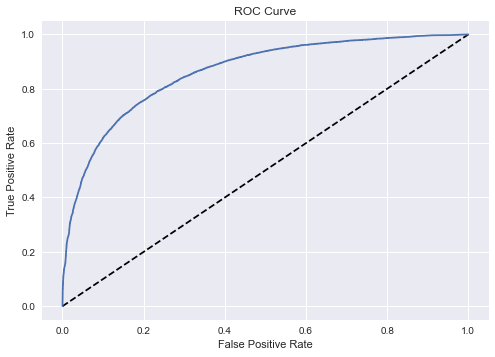

ROC AUC Score: 0.8619

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.76204493 0.75754296 0.75528139 0.76121212 0.75857143]

CV ROC AUC:
[0.852791   0.85268772 0.85533424 0.85348248 0.85580635]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [112]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model = RandomForestClassifier(max_depth = 18, max_features = 11, n_estimators = 50, class_weight={0: 1, 1: 35}, criterion = 'gini', random_state=21)

def_ModelTest.modeltraintest(vartrain, vartest, y_train, y_test, model)

### Feature Importance

In [113]:
df_fi = pd.DataFrame(model.feature_importances_)
df_fi

,0
0,0.160817
1,0.180708
2,0.071837
3,0.144231
4,0.165443
5,0.014985
6,0.036570
7,0.178631
8,0.008787
9,0.010374


In [114]:
#create list of column names

X_names = pd.DataFrame(list(X.columns))

In [115]:
#create dataframe for important column names

df_feat_imp = pd.concat([df_fi, X_names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp[df_feat_imp['Importance']!=0].sort_values('Importance', ascending = False)

,Importance,Features
1,0.180708,Age
7,0.178631,EstimatedSalary
4,0.165443,NumOfProducts
0,0.160817,CreditScore
3,0.144231,Balance
2,0.071837,Tenure
6,0.036570,IsActiveMember
5,0.014985,HasCrCard
11,0.012666,cty_Germany
9,0.010374,gen_Male


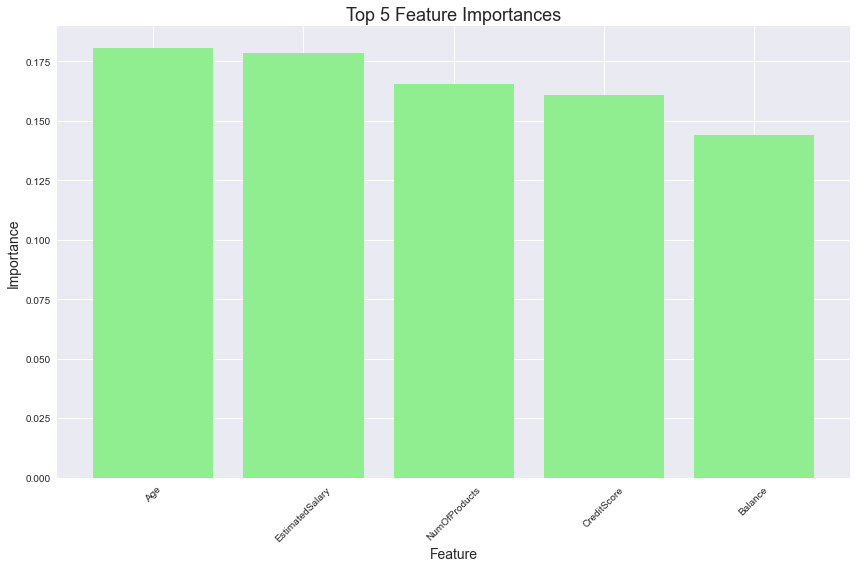

In [124]:
#the top five important features


top_features = df_feat_imp[df_feat_imp['Importance']!=0].sort_values('Importance', ascending = False).head(5)

plt.figure(figsize=(12, 8)) 
plt.bar(top_features['Features'], top_features['Importance'], color='lightgreen')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Importance', fontsize = 14)
plt.title('Top 5 Feature Importances', fontsize = 18)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

### Comparison of models

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

In [122]:
#Set the parameters for the models
model = [
         
#Logistic Regression 
         (X_train_sc, X_test_sc, y_train,'log_opt','Logistic',
          LogisticRegression(C=0.01, class_weight = None, penalty = 'l2', solver = 'lbfgs', random_state=21)), 
         (X_train_sc, X_test_sc, y_train,'log_dec', 'Logistic',
          LogisticRegression(C=0.01, class_weight = {0: 1, 1: 5}, penalty = 'l2', solver = 'lbfgs', random_state=21)),

#Random Forest 
         (X_train, X_test, y_train,'rf_opt', 'RandomForest',
          RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 50, class_weight={0:1, 1:5}, criterion = 'gini', random_state=21)), 
         (X_train, X_test, y_train,'rf_dec', 'RandomForest',
          RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 50, class_weight={0:1, 1:100}, criterion = 'gini', random_state=21)),
]
          
cm_all = pd.DataFrame(columns=['Model', 'Type','pred_stayed', 'pred_left', 'Score', 'Recall', 'Precision', 'F1'])

for tr, tst, yt, n, mod, m in model:
    m.fit(tr, yt) 
    model_pred = m.predict(tst)
    model_prob = m.predict_proba(tst)
    score = m.score(tst, y_test)
    score_format = '{0:.4f}'.format(score)
    
    recall = recall_score(y_test, model_pred)
    recall_format = '{0:.4f}'.format(recall)

    f1 = f1_score(y_test, model_pred)
    f1_format = '{0:.4f}'.format(f1)
    
    precision = precision_score(y_test, model_pred)
    precision_format = '{0:.4f}'.format(precision)

    y_pred_prob = m.predict_proba(tst)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    exec(f'fpr_{n} = fpr')
    exec(f'tpr_{n} = tpr')
    exec(f'thresholds_{n} = thresholds')
    exec(f'{n} = n')
    
    
    cm = pd.DataFrame(confusion_matrix(y_test, model_pred))
    cm=cm.rename(columns = {0:'pred_stayed', 1:'pred_left'})
    
    exec(f'cm_{n} = cm')
    cm['Model'] = mod
    cm['Type'] = n
    cm['Score'] = score_format
    cm['Recall'] = recall_format
    cm['Precision'] = precision_format
    cm['F1'] = f1_format

    
    cm_all = pd.concat([cm_all, cm], axis=0)  
    print(n + " - Score: " + str(score_format) + " - Recall: " + str(recall_format) + " - Precision: " + str(precision_format) + " - F1: " + str(f1_format))    
    print('----------------------------------------------------------------')

cm_all = cm_all.reset_index()
cm_all['index'] = np.where(cm_all['index']==0, 'stayed', 'left')
cm_all = cm_all.rename(columns={'index':'actual'})

display(cm_all)
print('--------------------------------------------------------------------')

log_opt - Score: 0.8361 - Recall: 0.3829 - Precision: 0.7036 - F1: 0.4959
----------------------------------------------------------------
log_dec - Score: 0.7020 - Recall: 0.8050 - Precision: 0.3975 - F1: 0.5322
----------------------------------------------------------------
rf_opt - Score: 0.8562 - Recall: 0.5656 - Precision: 0.6946 - F1: 0.6235
----------------------------------------------------------------
rf_dec - Score: 0.7338 - Recall: 0.8037 - Precision: 0.4294 - F1: 0.5597
----------------------------------------------------------------


,actual,Model,Type,pred_stayed,pred_left,Score,Recall,Precision,F1
0,stayed,Logistic,log_opt,37398,1681,0.8361,0.3829,0.7036,0.4959
1,left,Logistic,log_opt,6432,3991,0.8361,0.3829,0.7036,0.4959
2,stayed,Logistic,log_dec,26361,12718,0.7020,0.8050,0.3975,0.5322
3,left,Logistic,log_dec,2033,8390,0.7020,0.8050,0.3975,0.5322
4,stayed,RandomForest,rf_opt,36487,2592,0.8562,0.5656,0.6946,0.6235
5,left,RandomForest,rf_opt,4528,5895,0.8562,0.5656,0.6946,0.6235
6,stayed,RandomForest,rf_dec,27947,11132,0.7338,0.8037,0.4294,0.5597
7,left,RandomForest,rf_dec,2046,8377,0.7338,0.8037,0.4294,0.5597


--------------------------------------------------------------------


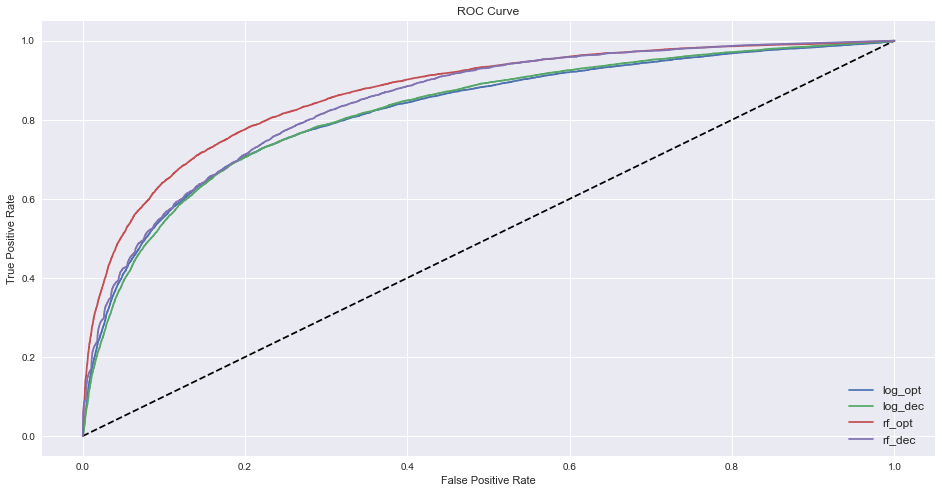

In [123]:
plt.figure(figsize=(16,8))
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_log_opt, tpr_log_opt, label=log_opt)
plt.plot(fpr_log_dec, tpr_log_dec, label=log_dec)
plt.plot(fpr_rf_opt, tpr_rf_opt, label=rf_opt)
plt.plot(fpr_rf_dec, tpr_rf_dec, label=rf_dec)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.show();

### Recommendations


- Tailored retention strategies could include improved customer service, localized marketing campaigns, or product offerings suited to regional preferences, especially in Germany.
- The bank might review service delivery methods or product features that may not meet the needs of female customers.
- The bank could conduct satisfaction surveys among customers from time to time to understand their grievances and act on them.